# 1. 군집화(Clustering)

## 1-1 머신러닝: 비지도 학습
- 컴퓨터가 스스로 학습하게 도와주는 알고리즘
- 지도학습, 비지도학습으로 나뉨.

**비지도학습의 특징**
- 데이터에 내제된 구조 파악하여 학습
- 정답이 없어 모델 성능 측정이 어려움
- 피처 학습으로 패턴 식별 가능

**비지도학습이 적합한 경우**
1. 패턴이 알려지지 않은 경우
2. 패턴이 변하는 경우
3. 열린 문제 해결 + 지식 일반화
- 고객 성향 분석, 이상 거래 탐지, 자연어 처리 등

## 1-2 군집화란?
- 데이터를 군집으로 나누는 비지도학습
  - 군집: 유사 데이터의 집합. 서로 다른 군집의 개체들은 비슷하지 않아야 함
- 그룹 구성 요소를 파악해서 데이터 구조 이해

**비지도학습: 군집화**
- 종속변수를 설정하지 않음. 데이터 내부 패턴을 인식하여 유사하게 나눔.
- 사전 목표가 없기 때문에 비지도학습으로 분류됨.

**군집화의 목표**
1. 응집도(cohension) 최대화: 같은 군집 요소끼리는 최대한 비슷하게
2. 분리도(separation) 최대화: 서로 다른 군집 요소끼리는 최대한 분리되게
- 유사성 유지 + 그룹 간 분리가 중요하다.

## 1-3 군집화 과정
**군집화의 기본 과정**
<br/><br/>
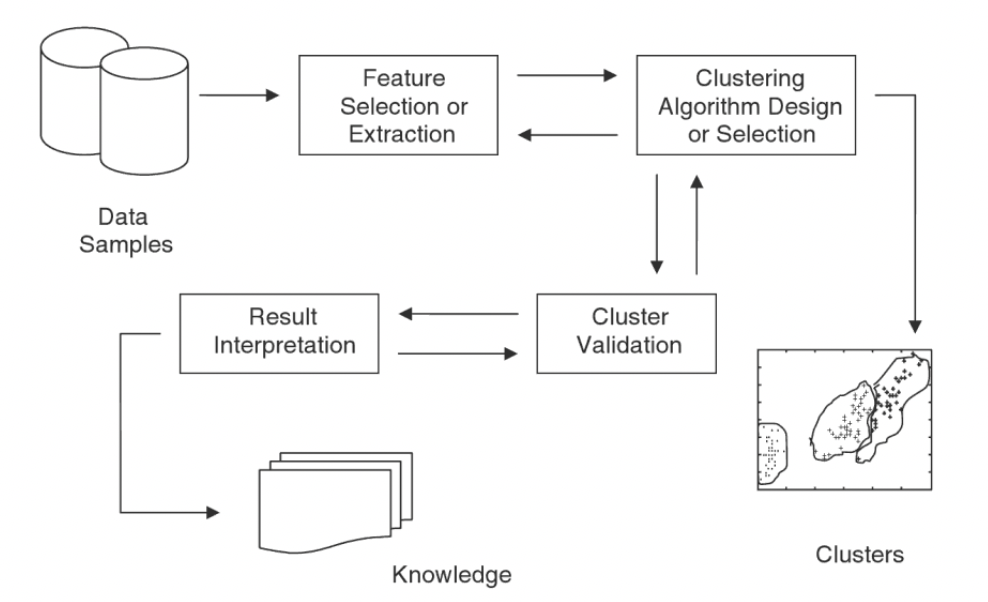
1. 피처 선택 및 추출
2. 군집화 알고리즘 선택: 데이터 특성, 목표에 따라 알고리즘 선택
3. 군집 유효성 검증
4. 결과 해석

# 2. 군집화를 위한 데이터 준비
## 2-1 군집화의 주요 고려사항
군집화는 여러 번 반복 시도를 통해 최적의 결과를 찾음. <br/>
따라서 아래 세 목록을 고려해야 함.
1. 변수 유형 이해
- 피처의 종류와 특성 이해
- 연속형/명목형, 변수 개수 등 고려
2. 거리/유사도 정의와 측정
- 거리+유사도 기반으로 그룹을 형성하기 때문에 변수 유형에 따른 거리 정의가 중요하다.
3. 차원 축소
- 유사 변수를 묶어 차원 축소 고려
- 유사 변수 통합 또는 불필요한 변수 제거

## 2-2 변수 유형 이해
**변수 유형별 군집화 고려사항**
1. 연속형 변수
- 수치로 측정 가능한 변수
- 거리 측정: 유클라디안, 맨하탄 등
- K-means, 계층적 군집화 등
- 스케일링 필수!!(단위 통일)
2. 명목형 변수
- 범주로 구분되는 변수
- 해밍거리, 자카드 거리 등
- K-modes, 계층적 군집화(특별 함수 사용) 등
- 원-핫 인코딩, 더미 변수 변환
3. 혼합형 변수
- 연속형 + 명목형 데이터
- K-prototypes, Gower distance 기반 계층적 군집화
- 변수 유형에 맞는 거리 함수를 조합하여 사용하기

## 2-3 거리/유사도 정의와 측정
### 데이터의 거리 측정 방법
데이터, 군집 간 유사성/비유사성을 수치로 계산하기
<br/><br/>
1. 유클리디안 거리(Euclidean Distance)
$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$
- 가장 일반적임
- 직선거리. K-means에서 기본적으로 사용됨.
<br/><br/>
2. 맨하탄 거리(Manhattan Distance)
$$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^n |x_i - y_i|$$
- 각 차원 차의 절댓값 합
- 이상치에 덜 민감함
<br/><br/>
3. 코사인 유사도(Cosine Similarity)
$$\text{similarity} = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \times ||\mathbf{y}||}$$
- 벡터 간 각도 측정
- 텍스트/고차원 데이터에 효과적

### 6가지 연결 방법
1. Single linkage(단일/최단 연결법)
- 군집 A, B에서 가장 가까운 두 점의 거리로 정의
- 고립 군집을 찾는데 중점
- 이상치에 취약: 가장 가까운 점 기준이기 때문에

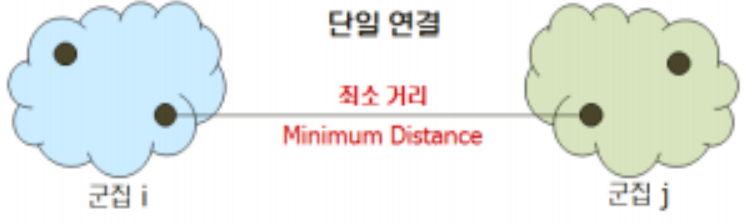

2. Complete linkage(완전/최장 연결법)
- 군집 A, B에서 가장 먼 두 점의 거리로 정의
- 최댓값을 측정하여 유사성이 큰 군집으로 병합하기
- 군집 내부 응집성에 중점
- 이상치에 민감

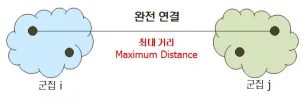

3. Average linkage
- 모든 항목에 대한 거리 평균
- 이상치에 덜 민감
- 계산량 많아질 수 있음
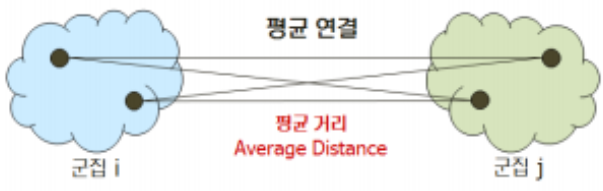

4. Centroid method
- 두 군집의 중심 간 거리
- 결합된 군집의 평균은 가중평균으로 구함.
- 중심 계산으로 인해 오래 걸림
- 덴드로그램에서 거리 축이 아래로 줄어드는 inversion 가능성
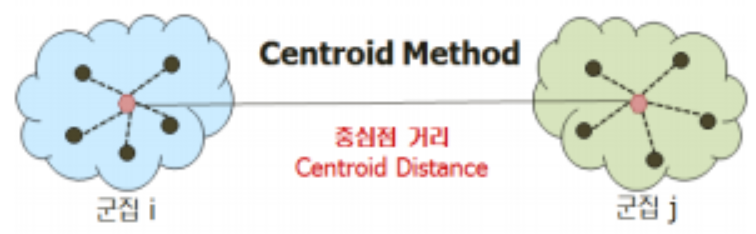

5. median
- 병합 후 중심점과 기존 군집의 중심점 기반
- 모든 샘플의 중앙값으로 정의 -> 극단값 영향 덜 받음
- 기하적 구조 파악은 어려움.

6. Ward's procedure
- 군집 내 제곱합(SSE)이 증가하지 않도록 병합
- 병합 후 SSE 증가량이 최소인 것 선택
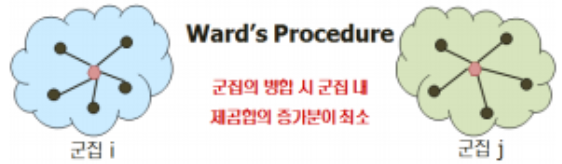

**<요약>**
- Single: 가장 가까운 점
- Complete: 가장 먼 점
- Average: 모든 점 간 평균 거리
- Centroid: 군집의 중심점 사이
- Median: 군집의 중앙값 사이
- Ward: 군집 내 분산 최소화

## 2-4 차원 축소
### 차원의 저주
- 데이터의 차원이 높아질수록 데이터 사이 거리가 늘어나 밀도가 낮아지는 차원의 저주 발생
- 피처 공간이 너무 커 데이터를 효율적으로 훈련할 수 없는 상황
- 차원 축소를 해야 한다.

### 차원 축소
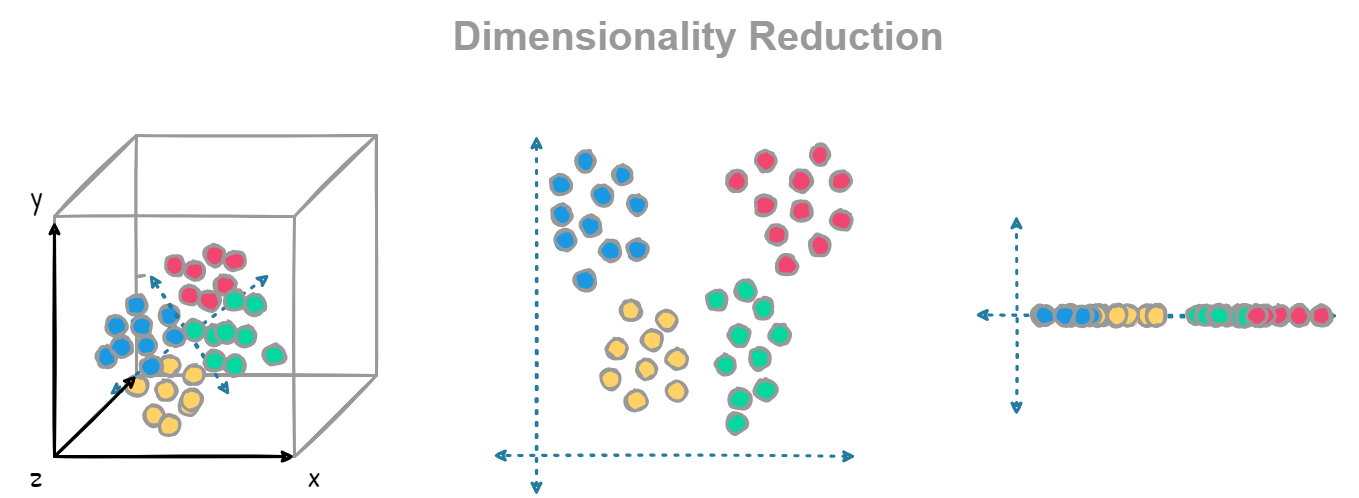
- 변수의 개수를 줄여 저차원으로 만들면서 핵심 정보는 지켜내자.
- 노이즈를 줄여 패턴 학습 쉬워짐
1. 선형 투영: 고->저로 선형적 데이터 투영
  - PCA, 특잇값 분해, 랜덤 투영 등
2. 매니폴드 학습(비선형 차원 축소): 유클리드 거리가 아닌 데이터의 곡선 거리를 고려해여 학습
  - t-SNE, UMAP, lsomap 등


### PCA(Principal Component Analysis)
- 다차원 데이터에서 정보량이 제일 큰 방향을 찾고, 그 방향으로 데이터를 투영하여 차원 줄이기
- 분산을 최대한 보존: 시각화 및 분석 용이
- 상관관계가 높은 변수끼리 결합.
- 주성분: 새로 파생된 성분
1. 공분산 행렬 계산
2. 고윳값 분해
3. 고윳값이 높은 상위 k개 고유벡터 선택
4. 데이터 투영

### PCA 사용하기
**중요 속성들**
- explained_variance_ratio_: 각 주성분이 설명하는 분산 비율
- explained_variance_: 각 주성분의 실제 분산값
- components_: 주성분 벡터. 어떤 원본 변수가 각 주성분에 얼마나 기여하는지
- n_components_: 실제 선택된 주성분 수

**주의사항**
1. 데이터 표준화 필수
2. 결측값 처리
3. 직관적 해석의 어려움
4. 정보 손실

# 3. 군집화 알고리즘
## 3-1 계층적 군집화(Hierarchical Clustering)
- 데이터 간 유사성 기반으로 dendrogram 형성, 상향식/하향식으로 군집 형성
  - 덴드로그램: 군집 병합 과정을 시각적으로 표현한 트리 구조

### 계층적 군집화의 특징
- 군집 수를 사전 설정하지 않음. 클러스터링 후 선택 가능
- 상향식 트리 구조: 응집형 계측적 군집화
- 하향식 트리 구조: 분리형 계측적 군집화

### 응집형/분리형 계층적 군집화
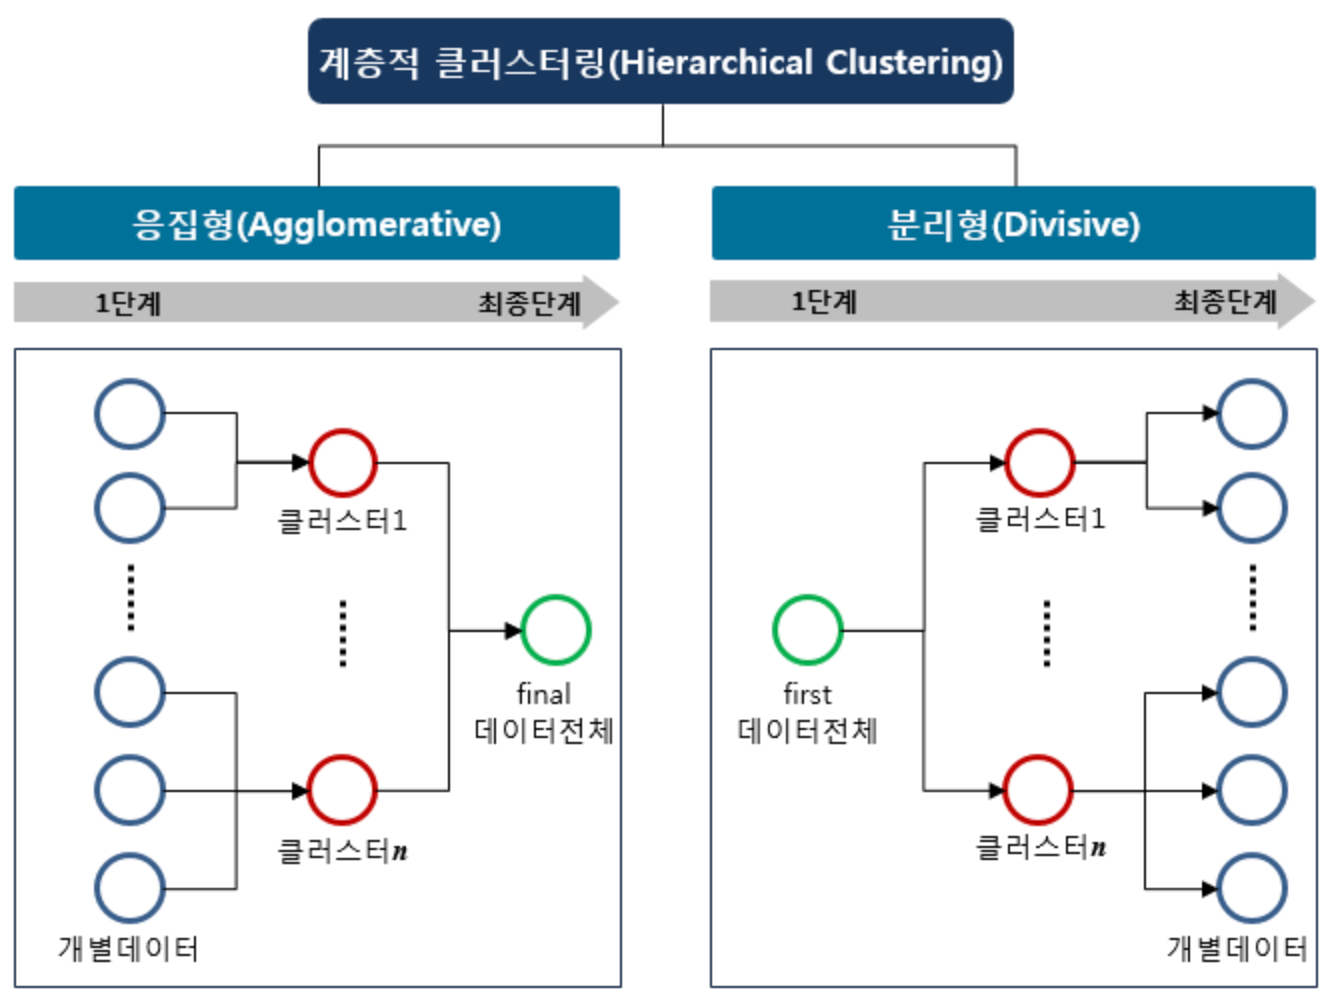
- 두 방법 모두 proximity matrix 기반으로 조직화

**응집형 클러스터링**
- 하나의 군집만 남을 때까지 가까운 군집과 병합
- 가장 가까운 군집의 정의에 따라 다양하게 나뉨.
- 단일/완전연결이 대표적이다.
1. 거리행렬 계산
2. 단일 클러스터로 시작
3. 가장 가까운 군집과 병합
4. 거리행렬 업데이트
5. 반복

**분리형 클러스터링**
- 하나의 군집에서 유사성이 낮은 데이터들을 군집으로 나눔.

### 계층적 군집화 시각화
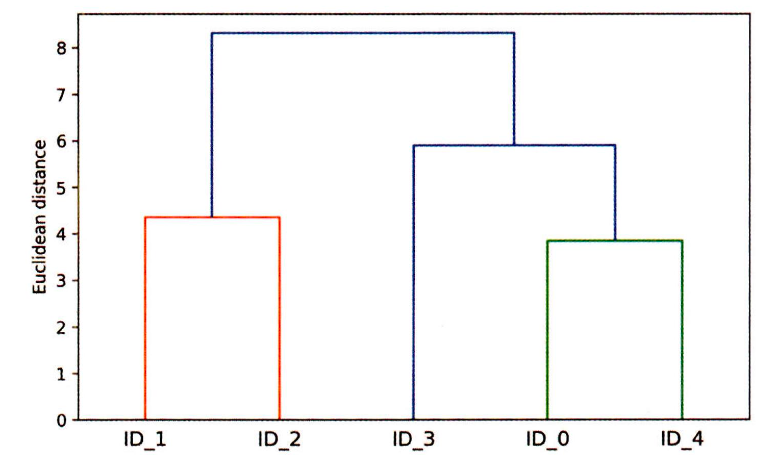
- 소규모를 시각적으로 분석할 때 유용하다.

## 3-2 k-means

### k-means
- 데이터를 k개 그룹으로 나누되, 중심점과 가장 가까운 데이터끼리 묶기
- 가장 일반적임
- 프로토타입 기반 군집화: 대표점 기준으로 묶는 방법
  - 연속형 -> centroid 평균 사용
  - 범주형 -> medoid 최빈값? 사용

### k-means의 주요단계
1. 랜덤하게 k개의 중심점을 초기 군집의 중심으로 선택
2. 각 표본을 가까운 중심점에 할당함(예: 유클라디안 거리. 스케일 필수)
3. 할당된 표본의 평균을 계산하여 중심점 업데이트
4. 기준을 만족할 때까지 반복
$$SSE = \sum^n_{i=1} \sum^k_{j=1} w^{(i, j)} \parallel \mathbf{x}^{(i)} - \boldsymbol{\mu}^{(j)} \parallel ^2_2$$
- SSE 최소화를 목표로 한다.
- 스케일은 Z-Score 표준화, Min-Max Scale, Standard Scale 등으로

### k-means의 장단점
- 장점
  - 직관적, 대용량 적용 사능
- 단점
  - 초기 중심값, 아웃라이어에 민감
  - k 결정이 어렵다: 엘보우 방법, 실루엣 계수 등 이용
  - 기하적 모양의 군집은 파악하기 어려움

### k-means++ 알고리즘
- 초기 중심점을 서로 멀리 떨어진 곳에 위치시키기
- k-means는 랜덤임
1. 빈 집합 M을 초기화
2. 중심점을 랜덤하게 선택하고 M에 할당
3. M에 없는 점까지 최소제곱거리를 찾음
4. 확률 분포를 사용해서 다음 중심점 랜덤하게 선택
5. 반복 후 k-means 알고리즘 수행

### 엘보우 방법(elbow method)
- SSE 바탕으로 최적의 k 추정
- 왜곡이 빠르게 감소하는 지점의 k 값 찾기
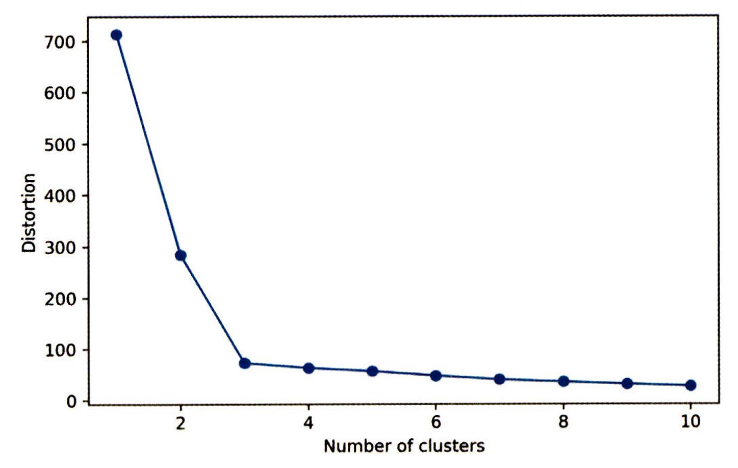
- 3 이후로는 k를 증가시켜도 SSE 감소 효과가 미미하기 때문에 3으로 선택
- 직관적이고 구현이 간단하다.
- 주관이 개입하고, 엘보우가 모호할 수도 있다.

## 3-3 DBSCAN
- 고밀도 지역을 묶고, 밀도를 만족하지 못하는 점은 군집에 포함시키지 않기
- density-based spatial clustering of applications with noise
- 밀집도: 특정 거리 내에 존재해야 하는 데이터의 최소 개수

### DBSCAN의 특징
- 이상치를 지정하여 군집에서 제외
- 이상치에 덜 민감
- 어떤 데이터가 여러 군집 거리 내에 있으면 가장 밀도가 높은 군집과 그룹화

### DBSCAN 알고리즘의 주요 단계
1. 샘플 분류
  - 핵심샘플/경계샘플/잡음샘플
  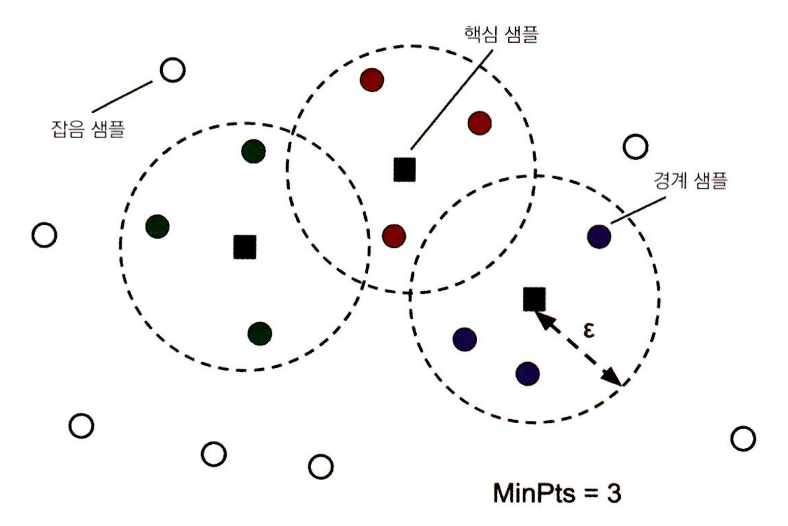
2. 군집 생성
3. 경계 샘플 군집에 할당하기

**<하이퍼파라미터>**
- eps: 이웃이 되기 위한 최대 거리
- min_samples: 군집이 되기 위한 eps 내 최소 포인트 개수

### DBSCAN의 장점
- 기하학적 분포를 갖는 데이터 처리 좋음
- 이상치 민감 X
- 모든 샘플을 할당하지 않고 잡음을 구분함.

### DBSCAN의 단점
- eps, min_samples에 영향 많이 받음
- eps 조절 어려움. 도메인 지식도 필요하다.
- 밀도가 높은 곳에 집중하여 낮은 곳의 데이터를 잡음으로 구분해버림
- 차원의 저주 문제: 변수가 늘어나면 정확도가 낮아짐.

### HDBSCAN: 계층적 DBSCAN
1. 밀도기반 1차 군집화 
2. 거리 기준으로 그 군집을 반복적으로 연결 -> 밀도 기준 한계 보완

- min_cluster_size: 군집 인정을 위한 최소 샘플 수
- min_samples

## 3-4 Gaussian Mixture Model (GMM)
- 데이터가 다른 모양의 가우시안 분포로 구성되었다고 가정
- 각 분포를 군집으로 인식
> 단일 분포로 표현하기 어려운 분포를 다수의 가우시안 분포로 표현하자!!
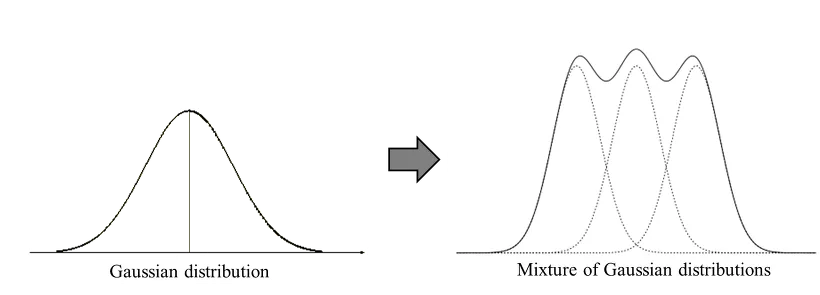

### GMM의 특징
- 모델 기반 군집화: 통계 모델을 가정하고 거기서 생성되었다는 전체 하에 군집화
- 각 군집을 확률 분포로 봄
- 여러 확률 분포의 혼합. 데이터 생성 메커니즘 모델링도 가능

### GMM의 가정
- 관측된 데이터: 특정 가우시안 확률 분포에 의해 생성됨
- 전체 데이터셋: K개의 다변량 가우시안 분포 혼합
- 개별 데이터: 우도에 따라 K개의 가우시안 분포 중 하나에 속함
  - 확률: 고정된 확률분포에서 특정 관측값이 나타나는지에 대한 확률
  - 우도: 고정된 관측값이 어떤 확률분포에서 어떤 확률로 나타나는지에 대한 확률
  - GMM은 우도를 최대화하는 방향으로 설계됨.

### GMM의 진행 과정
1. 전체 데이터셋 분포 확인
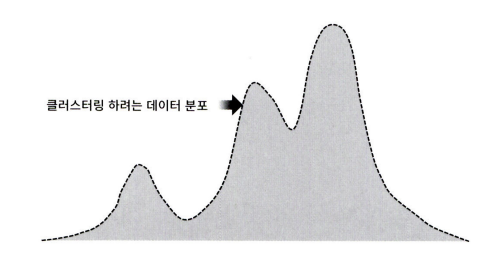<br/><br/>
2. 서로 다른 정규분포 형태의 확률 분포 곡선으로 구성되어 있다고 가정하기
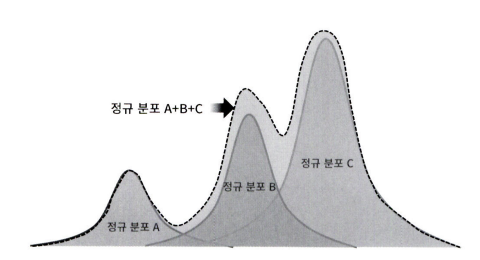<br/><br/>
3. 여러 개의 정규분포 추출 후 개별 데이터가 어디에 속하는지 결정.
- 각각의 분포가 하나의 군집이 된다. 사진의 경우, 3개의 군집 형성
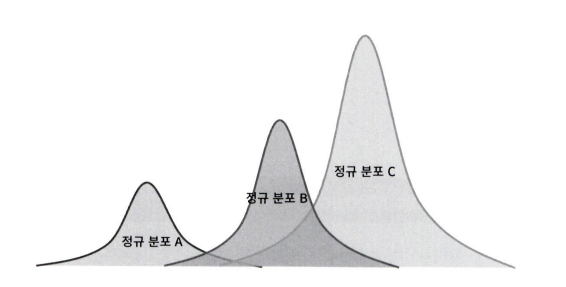

### 모델의 파라미터 추정
- GMM: 기댓값 최대화 알고리즘(Expectation Maximization)을 사용하여 파라미터를 추정함
  - 각 군집의 중심, 모양, 크기, 방향을 추정할 수 있다.
- 파라미터 구성
$
\begin{array}{l} \text{parameter } \theta = (u, \Sigma, \pi) \\ \text{hyper parameter } K(\text{분포 개수}) \end{array}
$

- EM 알고리즘 단계
  1. $(u, \Sigma, \pi)$의 초기 값을 설정한다.
  2. E step: $\theta$를 통해 x가 특정 군집에 속할 사후확률 계산
  3. M step: 계산된 사후확률을 통해 $u, \Sigma, \pi$ 다시 추정
  4. 수렴 조건이 만족할 때까지 E-M을 반복한다.

### GMM의 장점
- k-means보다 유연함(다양한 데이터셋 가능)
- 타원형 분포, 중첩 군집 구조에서도 좋은 성능

### GMM의 단점
- 오래 걸림
- 가우시안 분포에 맞지 않는 데이터: 계산 복잡, 성능 저하

### K-maens vs. GMM
**K-means**
- 중심 기반
- 원형 분포에 유리
- 빠름
- 길쭉한 분포에서 최적화 어려움

**GMM**
- 확률 분포 기반
- 다양한 분포 가능
- 길쭉한 분포도 준수함
- 오래 걸리고 정규성 가정 필요함

# 4. 군집화 평가 방법
비지도학습인 군집화의 성능 평가는 어떻게 해야 할까?

## 4-1 외부 평가와 내부 평가
1. 외부 평가
- 정답 레이블이 존재하는 경우, 군집화 결과와 정답을 비교하여 얼마나 유사한지
- ARI(Adjusted Rand Index): 군집화 결과와 정답 간 일치도 측정
  - RI를 보완하여, 우연에 의한 일치 가능성을 배제함
  - 한 일치 가능성을 배제한 지표
  - 성능을 객관적으로 비교할 수 있음
- 왜 굳이 군집화?
  - 데이터에 대한 새로운 시각
  - 데이터 구조에 대한 이해 심화

2. 내부 평가
- 정답 레이블이 없는 경우
- 응집도, 분리도 기반으로 정량 측정 => 데이터 자체 구조 기반 판단
- 알고리즘 별 평가 지표 존재
  - K-means: SSE 최소화
  - GMM: 로그 우도(데이터를 얼마나 잘 설명하는지)를 최대화
- 실루엣 계수, 던 지수

## 4-2 실루엣 계수
- 군집 내 데이터가 얼마나 조밀하게 모여있는지 측정
$$
s^{(i)} = \frac{b^{(i)} - a^{(i)}}{\max \left\{ b^{(i)}, a^{(i)} \right\}}
$$

1. 샘플 xi와 동일한 군집 내 모든 데이터 사이를 평균 내어 응집력 ai 계산
2. xi와 가장 가까운 군집의 데이터끼리의 평균 거리로 분리도 bi 계산
3. 응집력과 분리도 차이로 실루엣 si 계산

### 실루엣 계수 해석
- [-1, 1] 값을 가짐.
- 보통 0.7 이상이면 잘 되었다고 봄
- 분리도가 응집도보다 큰 경우($b^{(i)} > a^{(i)}$) 1에 가까우짐.
  - 자기 군집에 잘 속하고, 다른 군집과는 멀고
- 분리도가 응집도와 같은 경우($b^{(i)} = a^{(i)}$) 0이 됨
  - 데이터가 경계에 있고, 거리도 모호
- 분리도가 응집도보다 작은 경우($b^{(i)} < a^{(i)}$) -1에 가까워짐
  - 데이터는 잘못된 군집에 속하고 군집도 구별되지 않음

- 군집화 잘 된 경우 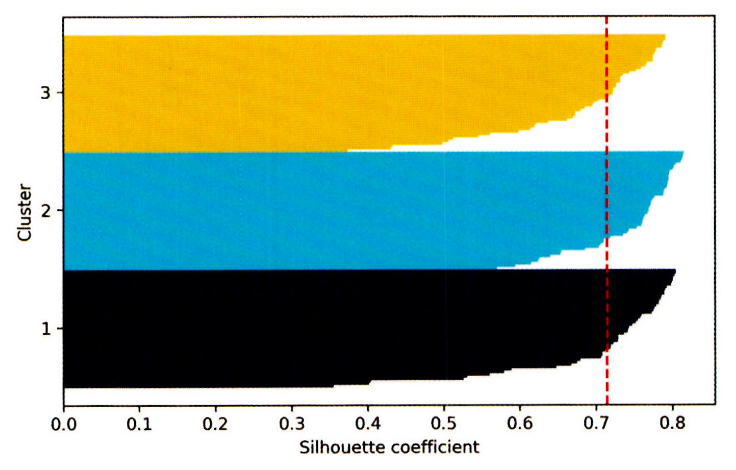
- 군집화 잘 안 된 경우 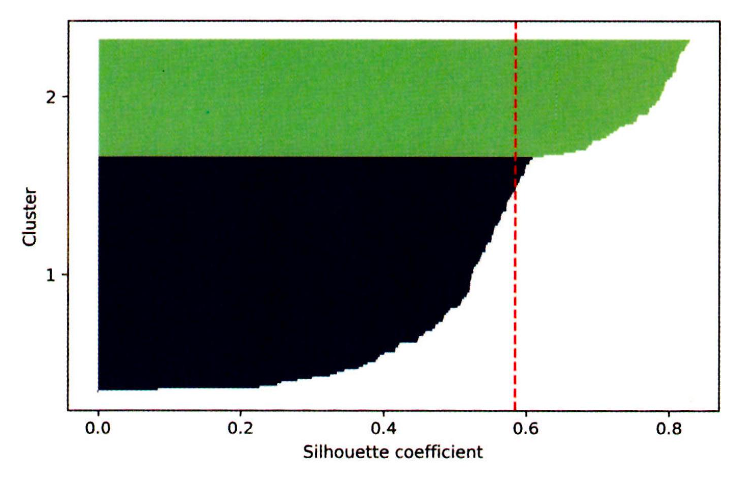

### 4-3 Dunn Index
- 군집 간 최소 거리인 분리도와 군집 내 최대 거리인 응집도의 비율을 계산하여 평가

### Dunn Index 계산
$$\text{Dunn Index} = \frac{
\min\limits_{i \ne j} \; d(C_i, C_j)}{\max\limits_{1 \le k \le K} \; \delta(C_k)}$$
- $d(C_i, C_j)$: 분리도
  - 군집 중심 사이 거리/두 군집 간 최소 거리
- $\delta(C_k)$: 응집도
  - 군집 안에서 가장 먼 두 점의 거리

### Dunn Index 해석
- 클수록 좋은 군집화
- 일반적으로 0 이상이며, 무한대까지 가능
- 실루엣 계수와 종합적으로 평가하자.

### Dunn Index의 한계
- 군집 수 많아지면 계산량 증가
- 극단값에 큰 영향
- 이상치에 민감하여 수치가 낮게 나올 수 있음.